### Manual implementation of Support Vector Machine for Spam Filtering

In [149]:
# importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Uploading dataset file
from google.colab import files
files.upload()

# Storing the data from file to a list (Vector)
dataset = np.loadtxt('spambase.data', dtype = 'float32', delimiter = ',')
M = len(dataset[0])-1

# Getting first 57 elements of a list as features
features = dataset[:, :M]
# Getting last element of a list as output of respective email
target = dataset[:, -1]

labels = LabelEncoder().fit_transform(target)
feature_std = StandardScaler().fit_transform(features)

# Splitting data into training and testing data set. ratio is of 70/30
x_train, x_test, y_train, y_test = train_test_split(feature_std, labels, test_size=0.2, random_state=0)
x_train_size, feature_size = x_train.shape
x_test_size, target_size = x_test.shape

Saving spambase.data to spambase (9).data


In [152]:
# Below is the manual implementation of Linear SVM model

=> epoch  0: loss= 7.28
=> epoch 100: loss= 4.99
=> epoch 200: loss= 3.59
=> epoch 300: loss= 2.66
=> epoch 400: loss= 2.08
=> epoch 500: loss= 1.50
=> epoch 600: loss= 1.12
=> epoch 700: loss= 0.86
=> epoch 800: loss= 0.78
=> epoch 900: loss= 0.73
=> epoch 1000: loss= 0.80
=> epoch 1100: loss= 0.67
=> epoch 1200: loss= 0.65
=> epoch 1300: loss= 0.56
=> epoch 1400: loss= 0.56
=> epoch 1500: loss= 0.62
=> epoch 1600: loss= 0.57
=> epoch 1700: loss= 0.65
=> epoch 1800: loss= 0.63
=> epoch 1900: loss= 0.56
=> epoch 2000: loss= 0.51
=> epoch 2100: loss= 0.61
=> epoch 2200: loss= 0.56
=> epoch 2300: loss= 0.65
=> epoch 2400: loss= 0.61
=> epoch 2500: loss= 0.54
=> epoch 2600: loss= 0.58
=> epoch 2700: loss= 0.61
=> epoch 2800: loss= 0.58
=> epoch 2900: loss= 0.70
=> epoch 3000: loss= 0.60
=> epoch 3100: loss= 0.55
=> epoch 3200: loss= 0.69
=> epoch 3300: loss= 0.60
=> epoch 3400: loss= 0.57
=> epoch 3500: loss= 0.61
=> epoch 3600: loss= 0.59
=> epoch 3700: loss= 0.56
=> epoch 3800: loss= 0.

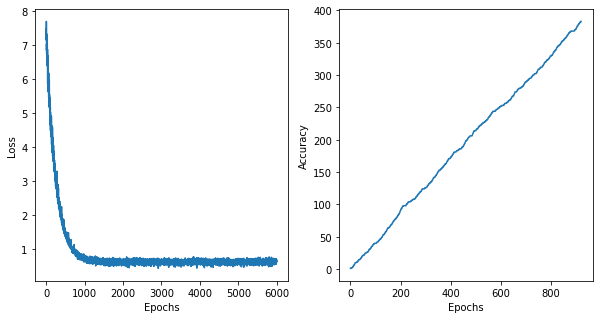

In [161]:
# Implementing Linear SVM model
class SVMModel(object):
  def __init__(self, num_features):
    self.W = tf.Variable(tf.random.normal(shape=[num_features, 1]))
    self.b = tf.Variable(tf.random.normal(shape=[1, 1]))
  
  def __call__(self, inputs):
    return tf.add(tf.matmul(inputs, self.W), self.b)

# computing the hinge loss of the model
def compute_hinge_loss(W, y_pred, y_true):
  l2_norm = tf.reduce_sum(tf.square(W))
  alpha = tf.constant([0.1])
  hinge_loss = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(y_pred, y_true))))
  loss = tf.add(hinge_loss, tf.multiply(alpha, l2_norm))
  return loss

# creating obejct of the class
SVMmodel = SVMModel(feature_size)

epochs = range(6000)
batch_size = 100
learning_rate = 0.01
acc = 0
loss_history, acc_history = [], []

# training the model
for epoch in epochs:
  rand_index = np.random.choice(x_train_size, size = batch_size)
  X = x_train[rand_index]
  Y = np.transpose([y_train[rand_index]])

  with tf.GradientTape() as tape:
    y_pred = SVMmodel(X)
    loss = compute_hinge_loss(SVMmodel.W, y_pred, Y)
  
  dw, db = tape.gradient(loss, [SVMmodel.W, SVMmodel.b])

  SVMmodel.W.assign_sub(learning_rate * dw)
  SVMmodel.b.assign_sub(learning_rate * db)

  loss_history.append(loss)

  if epoch % 100 == 0:
    print("=> epoch %2d: loss= %.2f" %(epoch, loss.numpy()))

# checking the accuracy of the model using testing dataset
y_pred_values = SVMmodel(x_test)

for i in range(x_test_size):
  if y_pred_values[i] >= 0.5:
    y_predicted = 1
  else:
    y_predicted = 0

  eq = tf.cast(tf.equal(y_predicted,y_test[i]), tf.float32)
  acc = acc + eq.numpy()
  acc_history.append(tf.reduce_mean(acc))

print("\nAccuracy: {:.2f}%\n".format((acc/x_test_size) * 100))

# plotting the loss as the training epoch increase
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plotting the accuracy of the model using the testing dataset
plt.subplot(1, 2, 2)
plt.plot(acc_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

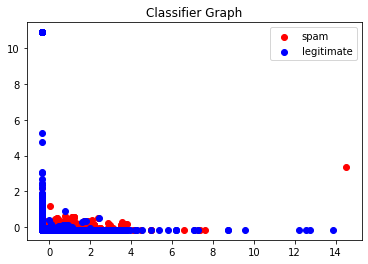

In [156]:
# plotting how classifier marks spam emails and legitimate emails
spam_emails = x_train[y_train == 1]
legitimate_emails = x_train[y_train == 0]
plt.title('Classifier Graph')
plt.scatter(spam_emails[:, 0], spam_emails[:, 1], color="red", label="spam")
plt.scatter(legitimate_emails[:, 0], legitimate_emails[:, 1], color="blue", label="legitimate")
plt.legend()

plt.show()

In [ ]:
# Below SVM linear model is implemented using sklear library


Accuracy: 91.53%



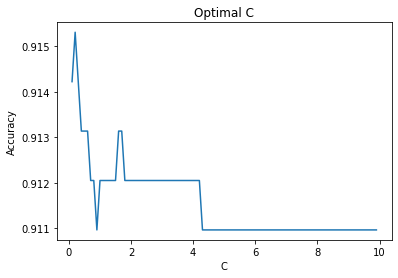

In [151]:
# Finding optimal C, SVM regularization parameter
C_range = np.arange(0.1, 7.0, 0.1)
C_score = []

for c in C_range:
  model = svm.SVC(C=c, kernel='linear', random_state = 0)
  model.fit(x_train, y_train)
  C_score.append(model.score(x_test, y_test))

final_C = C_range[np.argmax(C_score)]

# Using SVM model for training the dataset and checking the accuracy
svc = svm.SVC(kernel='linear', C=final_C).fit(x_train, y_train)
print("\nAccuracy: {:.2f}%\n".format(svc.score(x_test, y_test) * 100))

# plotting different values of C and their respective accuracy
plt.title("Optimal C")
plt.plot(C_range, C_score)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()